In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('data.csv', sep=';')

# Define features and target
X = data.drop('Target', axis=1)
y = data['Target']

# Initial split into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Further split the train set into new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.125, stratify=y_train_full, random_state=0)

# Check the sizes
print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 3096
Validation set size: 443
Test set size: 885


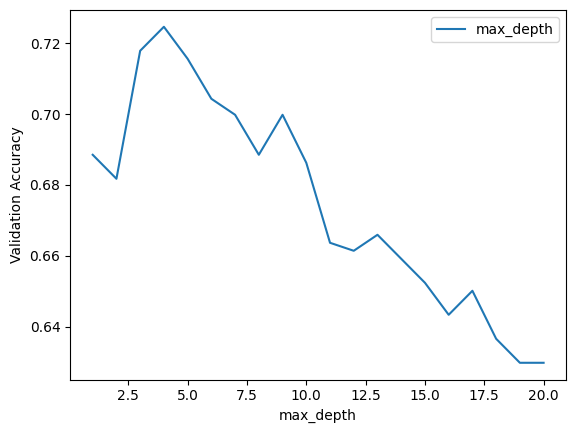

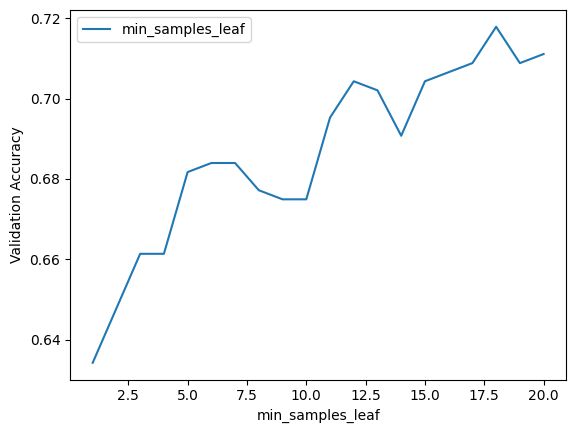

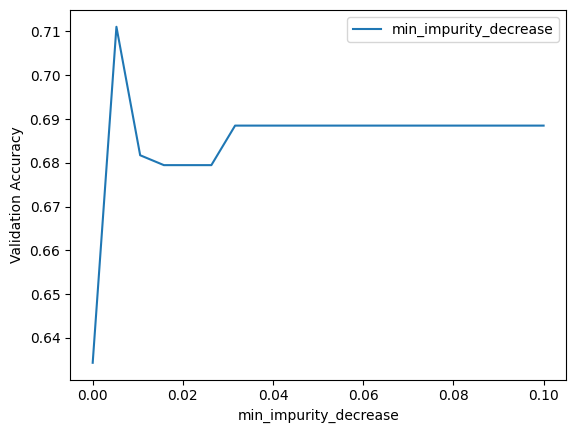

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define parameter ranges
max_depth_range = range(1, 21)
min_samples_leaf_range = range(1, 21)
min_impurity_decrease_range = np.linspace(0, 0.1, 20)

# Function to evaluate a parameter
def evaluate_param(param_name, param_values):
    val_accuracies = []
    for value in param_values:
        clf = DecisionTreeClassifier(**{param_name: value}, random_state=0)
        clf.fit(X_train, y_train)
        y_val_pred = clf.predict(X_val)
        val_accuracies.append(accuracy_score(y_val, y_val_pred))
    return val_accuracies

# Evaluate max_depth
val_accuracies_max_depth = evaluate_param('max_depth', max_depth_range)
plt.plot(max_depth_range, val_accuracies_max_depth, label='max_depth')
plt.xlabel('max_depth')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Evaluate min_samples_leaf
val_accuracies_min_samples_leaf = evaluate_param('min_samples_leaf', min_samples_leaf_range)
plt.plot(min_samples_leaf_range, val_accuracies_min_samples_leaf, label='min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Evaluate min_impurity_decrease
val_accuracies_min_impurity_decrease = evaluate_param('min_impurity_decrease', min_impurity_decrease_range)
plt.plot(min_impurity_decrease_range, val_accuracies_min_impurity_decrease, label='min_impurity_decrease')
plt.xlabel('min_impurity_decrease')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [13]:
# Best parameters based on validation accuracy
best_max_depth = max_depth_range[np.argmax(val_accuracies_max_depth)]
best_min_samples_leaf = min_samples_leaf_range[np.argmax(val_accuracies_min_samples_leaf)]
best_min_impurity_decrease = min_impurity_decrease_range[np.argmax(val_accuracies_min_impurity_decrease)]

# Train and evaluate the best models on the test set
best_clf_max_depth = DecisionTreeClassifier(max_depth=best_max_depth, random_state=0)
best_clf_max_depth.fit(X_train, y_train)
test_accuracy_max_depth = accuracy_score(y_test, best_clf_max_depth.predict(X_test))

best_clf_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf, random_state=0)
best_clf_min_samples_leaf.fit(X_train, y_train)
test_accuracy_min_samples_leaf = accuracy_score(y_test, best_clf_min_samples_leaf.predict(X_test))

best_clf_min_impurity_decrease = DecisionTreeClassifier(min_impurity_decrease=best_min_impurity_decrease, random_state=0)
best_clf_min_impurity_decrease.fit(X_train, y_train)
test_accuracy_min_impurity_decrease = accuracy_score(y_test, best_clf_min_impurity_decrease.predict(X_test))

# Baseline: Majority class classification
from sklearn.dummy import DummyClassifier
baseline_clf = DummyClassifier(strategy='most_frequent')
baseline_clf.fit(X_train, y_train)
baseline_accuracy = accuracy_score(y_test, baseline_clf.predict(X_test))

# Summarize results
print(f"Test set accuracy (max_depth={best_max_depth}): {test_accuracy_max_depth:.4f}")
print(f"Test set accuracy (min_samples_leaf={best_min_samples_leaf}): {test_accuracy_min_samples_leaf:.4f}")
print(f"Test set accuracy (min_impurity_decrease={best_min_impurity_decrease}): {test_accuracy_min_impurity_decrease:.4f}")
print(f"Baseline accuracy: {baseline_accuracy:.4f}")


Test set accuracy (max_depth=4): 0.7514
Test set accuracy (min_samples_leaf=18): 0.7571
Test set accuracy (min_impurity_decrease=0.005263157894736842): 0.7480
Baseline accuracy: 0.4994
